In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from math import floor
import random
from math import sqrt
from sklearn.metrics import mean_squared_error



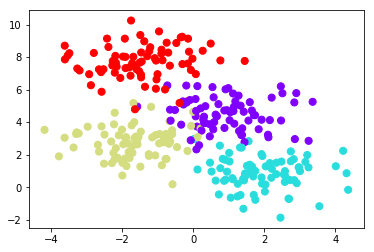

In [2]:
from sklearn.datasets import make_blobs
#create random dataset 
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [3]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

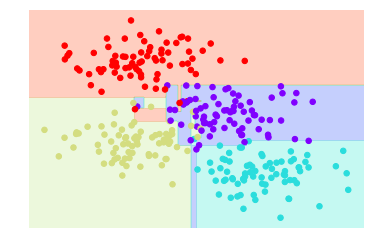

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1,oob_score=True)
tree.fit(X,y)

visualize_classifier(tree, X, y)

In [6]:
bag

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=1, verbose=0, warm_start=False)

In [7]:
predictions_tree = tree.predict(X)

In [8]:
from sklearn import metrics
print(metrics.classification_report(predictions_tree, y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        75
          1       1.00      1.00      1.00        75
          2       1.00      1.00      1.00        75
          3       1.00      1.00      1.00        75

avg / total       1.00      1.00      1.00       300



0.09333333333333338


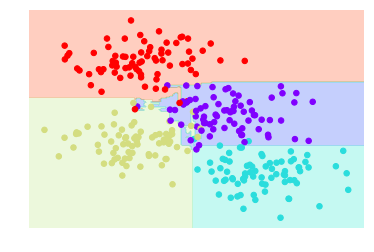

In [9]:
bag.fit(X, y)

visualize_classifier(bag, X, y)
oob_error = 1 - (bag.oob_score_)
print(oob_error)

# Extra Tree Classifier 

With respect to random forests, the method drops the idea of using bootstrap copies of the learning sample, and instead of trying to find an optimal cut-point for each one of the K randomly chosen features at each node, it selects a cut-point at random.

This idea is rather productive in the context of many problems characterized by a large number of numerical features varying more or less continuously: it leads often to increased accuracy thanks to its smoothing and at the same time significantly reduces computational burdens linked to the determination of optimal cut-points in standard trees and in random forests.

In [10]:
#Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

#fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)
#display the relative importance of each attribute
print(model.feature_importances_)

[0.37894279 0.62105721]


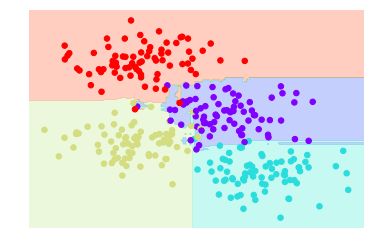

In [11]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model_forest, X, y);

In [12]:
# Random Forest with Regerssor

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np


boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
rf = RandomForestRegressor()
rf.fit(X, Y)
print ("Features sorted by their gini score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their gini score:
[(0.4034, 'LSTAT'), (0.395, 'RM'), (0.0831, 'DIS'), (0.0383, 'CRIM'), (0.0251, 'NOX'), (0.0134, 'TAX'), (0.0127, 'PTRATIO'), (0.01, 'B'), (0.0099, 'AGE'), (0.0056, 'INDUS'), (0.0019, 'RAD'), (0.0011, 'ZN'), (0.0005, 'CHAS')]


In [15]:
dtc = DecisionTreeRegressor(max_depth = 15)
dtc.fit(X,Y)
dtc.feature_importances_
print ("Features sorted by their gini score:")
print (sorted(zip(map(lambda x: round(x, 4), dtc.feature_importances_), names), 
             reverse=True))


Features sorted by their gini score:
[(0.5887, 'RM'), (0.2021, 'LSTAT'), (0.0754, 'DIS'), (0.0608, 'NOX'), (0.0198, 'CRIM'), (0.0172, 'B'), (0.0141, 'TAX'), (0.0093, 'AGE'), (0.0069, 'PTRATIO'), (0.0019, 'INDUS'), (0.0018, 'CHAS'), (0.0016, 'ZN'), (0.0005, 'RAD')]


In [ ]:
rf

# Discussion 

Feature importance should really be called something like "model participation", it measures how often and how much a feature was used in the model ( to make a split in a tree). If you remove a feature, the model may make up for it's absence by finding other remaining features that hold some of the same distinguishing information, i.e. features that are correlated with the feature you removed. This is a fundamental aspect of multi-feature models. 

## Issues in Interpretation

When the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. As a consequence, they will have a lower reported importance. 

In [32]:
# Demonstration

size = 10000
np.random.seed(seed=10)
X_seed = np.random.normal(0, 1, size)
X0 = X_seed + np.random.normal(0, .1, size)
X1 = X_seed + np.random.normal(0, .1, size)
X2 = X_seed + np.random.normal(0, .1, size)
X = np.array([X0, X1, X2]).T
Y = X0 + X1 + X2
  
rf = RandomForestRegressor(n_estimators=20, max_features=2)
rf.fit(X, Y);
print ("Scores for X0, X1, X2:", list(map(lambda x:round (x,3),rf.feature_importances_)))

Scores for X0, X1, X2: [0.272, 0.548, 0.179]


## Discussion: RF Feature Importance
When we compute the feature importances, we see that X1 is computed to have over 3x higher importance than X2, while their “true” importance is very similar. This happens despite the fact that the data is noiseless, we use 20 trees, random selection of features (at each split, only two of the three features are considered) and a sufficiently large dataset.




# Lets try Random Forests with Image data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

1

In [ ]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
model_decision =  DecisionTreeClassifier()
model_decision.fit(Xtrain,ytrain)
ypred_decision  = model_decision.predict(Xtest)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred_decision, ytest))



In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))


# Gradient Boosting
## Hard Coded
Another method used instead of bagging is boosting.


In [16]:
#Build a simple data set with y = x + random
nPoints = 1000
#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]
#print(xPlot)
#x needs to be list of lists.
x = [[s] for s in xPlot]
#print(x)
#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]
#take fixed test set 30% of sample
nSample = int(nPoints * 0.30)
idxTest = random.sample(range(nPoints), nSample)
idxTest.sort()
idxTrain = [idx for idx in range(nPoints) if not(idx in idxTest)]
#Define test and training attribute and label sets
xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]



In [ ]:
#maximum number of models to generate
numTreesMax = 30 
#tree depth - typically at the high end
treeDepth = 5
#initialize a list to hold models
modelList = []
predList = []
eps = 0.1 # gradient descent step size controller
#initialize residuals to be the labels y
residuals = list(yTrain)
for iTrees in range(numTreesMax):
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain, residuals) # here residuals = yTrain
    #make prediction with latest model and add to list of predictions
    latestInSamplePrediction = modelList[-1].predict(xTrain)
    #use new predictions to update residuals
    #Y_pred_new = y_pred + alpha* f(i)
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]
    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))
    #build cumulative prediction from first "n" models
    mse = []
    allPredictions = []
    for iModels in range(len(modelList)):
        #add the first "iModels" of the predictions and multiply by eps
        prediction = []
        for iPred in range(len(xTest)):
            prediction.append(sum([predList[i][iPred] for i in range(iModels + 1)]) * eps)
        allPredictions.append(prediction)
        errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
        mse.append(sum([e * e for e in errors]) / len(yTest))
      
nModels = [i + 1 for i in range(len(modelList))]
plot.plot(nModels,mse)
plot.axis('tight')
plot.xlabel('Number of Models in Ensemble')
plot.ylabel('Mean Squared Error')
plot.ylim((0.0, max(mse)))
plot.show()
plotList = [0, 14, 29]
lineType = [':', '-.', '--']
plot.figure()
for i in range(len(plotList)):
    iPlot = plotList[i]
    textLegend = 'Prediction with ' + str(iPlot) + ' Trees'
    plot.plot(xTest, allPredictions[iPlot], label = textLegend,
        linestyle = lineType[i])
plot.plot(xTest, yTest, label='True y Value', alpha=0.25)
plot.legend(bbox_to_anchor=(1,0.3))
plot.axis('tight')
plot.xlabel('x value')
plot.ylabel('Predictions')
plot.show()

MSE: 6.8469


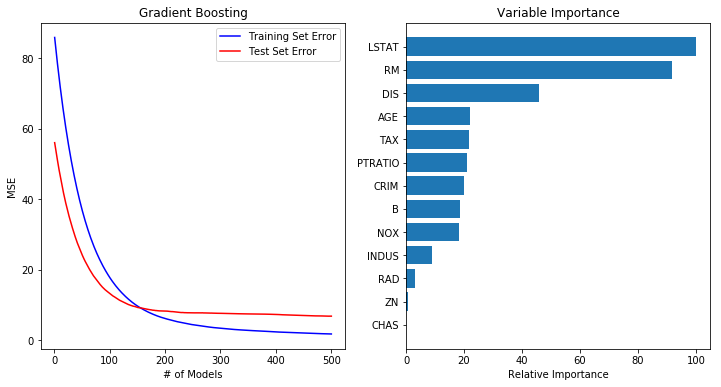

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error


# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


# Fit regression model
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth= 4, min_samples_split= 2,
          learning_rate= 0.01, loss= 'ls')

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# Plot training error

# compute test set error over 
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Gradient Boosting')

# clf.train_score gives us the error at each model iteration
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Error')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('# of Models')
plt.ylabel('MSE')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()